# Audio Fingerprinting

### Make FP Database

0 fingerprinted songs in db
(1/3) Fingerprinting for Billie Eilish - Happier Than Ever.mp3...
Detected peaks (4856, 2)


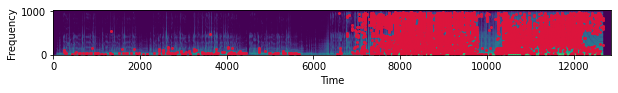

(2/3) Fingerprinting for Dua Lipa - Levitating.mp3...
Detected peaks (4886, 2)


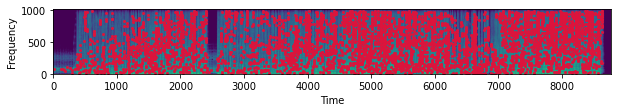

(3/3) Fingerprinting for Ed Sheeran - Bad Habits.mp3...
Detected peaks (4887, 2)


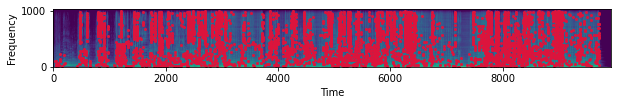

In [1]:
import os
import librosa
import numpy as np
from dotenv import load_dotenv
from kishikan import Kishikan

songs_dir = "../songs"

load_dotenv()
ksk = Kishikan(os.getenv('MONGO_URI'), db_name="kishikan", verbose=True)
ksk.fingerprint(songs_dir, save_meta=True)

### Room recorded audio test

Detected peaks (16, 2)


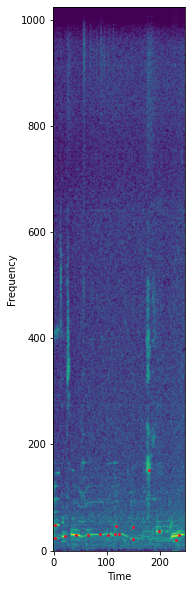

Expect Happier Than Ever, got Happier Than Ever @22.221s (100.0%)
Detected peaks (158, 2)


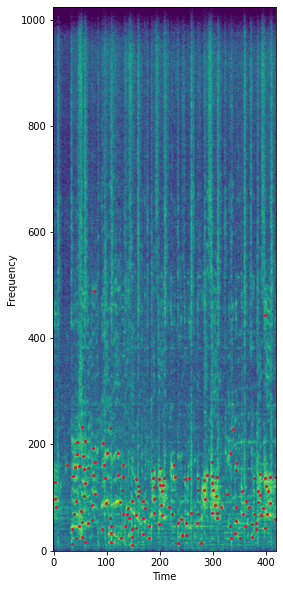

Expect Levitating, got Levitating @132.284s (90.91%)
Detected peaks (24, 2)


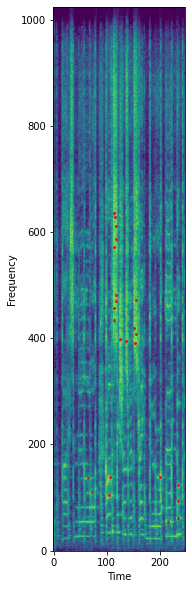

Expect Bad Habits, got Bad Habits @41.146s (100.0%)


In [2]:
from kishikan.utils import get_audio_files

test_dir = "../tests/fp"

for path, name, ext in get_audio_files(test_dir):
    top1 = ksk.match(path)[0]
    print("Expect {}, got {} @{}s ({}%)".format(name, top1["title"], top1["offset"], 100 * top1["match"]))

### Exact Matching in 2s

Matching 161-163 for ../songs/Dua Lipa - Levitating.mp3
Detected peaks (439, 2)


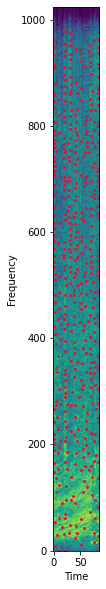

Predicted label: Levitating


In [3]:
from kishikan.utils import load_audio

filename = "../songs/Dua Lipa - Levitating.mp3"
interval = 2

duration = librosa.get_duration(filename=filename)

starting_pos = np.random.randint(0, duration - interval)

print(f"Matching {starting_pos}-{starting_pos + interval} for {filename}")

audio = load_audio(filename, offset=starting_pos, duration=interval)

label = ksk.match(audio, preloaded=True)[0]["title"]
print(f"Predicted label: {label}")

## Benchmark on GTZAN

### Fingerprint

In [ ]:
import os
import librosa
import numpy as np
from dotenv import load_dotenv
from kishikan import Kishikan
import uuid

DB_DIR = '../datasets/GTZAN'

db_id = str(uuid.uuid4())[:5]
print(db_id)
load_dotenv()
ksk = Kishikan(os.getenv('MONGO_URI'), db_name=f"GTZAN-{db_id}")
ksk.fingerprint(DB_DIR)

### Benchmark

In [ ]:
from kishikan.tests import benchmark

QUERY_DIR = '../datasets/query'

benchmark(ksk, QUERY_DIR, verbose=True, remarks=f"GTZAN-{db_id}")